# Weighted regression of global temperature data

The goal is to come up with a predictive model for temperatures based on data from 
https://datahub.io/core/global-temp



In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd


### Download the data

In [2]:
data = pd.read_csv("Temperature.csv")
data.head(3)


,Unnamed: 0,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,...,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON,var
0,0,1880,-0.17,-0.23,-0.08,-0.15,-0.08,-0.20,-0.17,-0.09,...,-0.22,-0.21,-0.17,-0.16,***,***,-0.10,-0.15,-0.19,5.0
1,1,1881,-0.19,-0.13,0.04,0.06,0.07,-0.17,0.02,-0.02,...,-0.2,-0.17,-0.05,-0.07,-0.08,-0.16,0.06,-0.06,-0.17,5.0
2,2,1882,0.18,0.15,0.06,-0.15,-0.13,-0.22,-0.15,-0.06,...,-0.23,-0.15,-0.35,-0.1,-0.07,0.09,-0.08,-0.14,-0.17,5.0


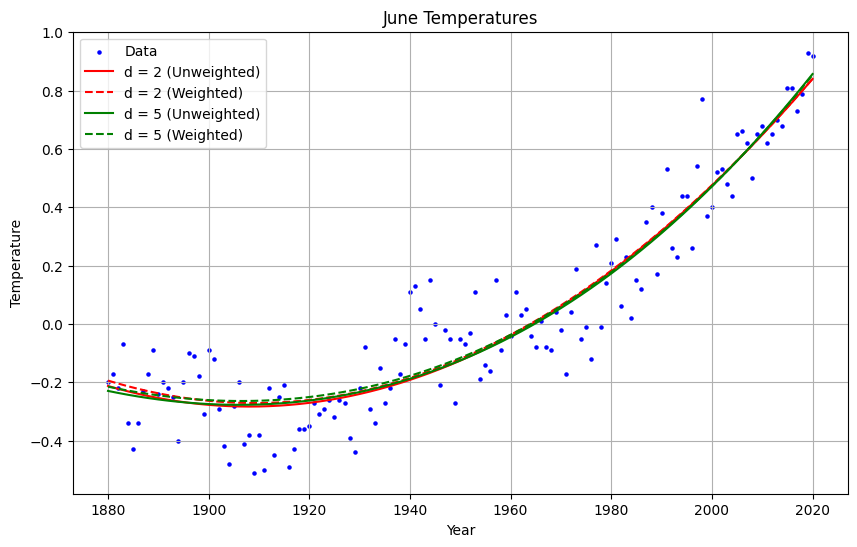

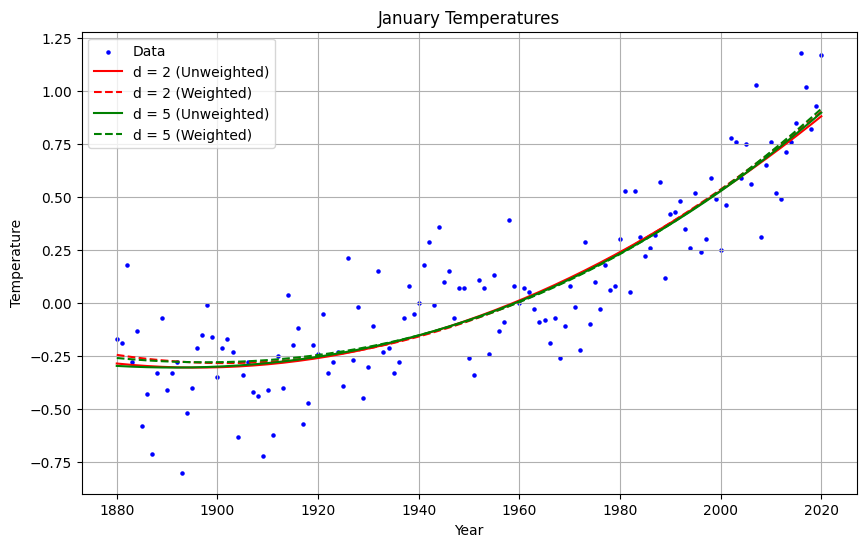

In [15]:
names = data.columns
# t = data['Year']
# y = data['Jan']
# var = (data['var'])


# # Define the polynomial model function
# def ypoly(t, a):
#     return np.polyval(a, t)

# # Perform the fits for d = 2 and d = 5
# d_values = [2, 5]
# fig, ax = plt.subplots()

# # Plot the original data points
# ax.scatter(t, y, label='Original Data')

# for d in d_values:
#     # Form the systems of equations
#     A = np.vander(t, d+1)
#     b = y / np.sqrt(var)  # Weighted least-squares
    
#     # Solve the systems of equations
#     a, _, _, _ = np.linalg.lstsq(A, b, rcond=None)
    
#     # Plot the best-fit curve
#     t_fit = np.linspace(t.min(), t.max(), 100)
#     y_fit = ypoly(t_fit, a)
#     ax.plot(t_fit, y_fit, label=f'Best-fit Curve (d={d})')

# # Add labels and legends
# ax.set_xlabel('Year')
# ax.set_ylabel('Temperature')
# ax.legend()

# # Show the plot
# plt.show()

years = data['Year'].values
june_temps = data['Jun'].values
january_temps = data['Jan'].values
variances = data['var'].values  # Adjust if column name is different

# Function to fit polynomial and return fitted values
def fit_polynomial(years, temps, d, weights=None):
    X = np.vander(years, d + 1, increasing=True)
    if weights is None:
        coeffs = np.linalg.lstsq(X, temps, rcond=None)[0]
    else:
        W = np.diag(np.sqrt(weights))
        coeffs = np.linalg.lstsq(W @ X, W @ temps, rcond=None)[0]
    fitted_temps = X @ coeffs
    return fitted_temps

# Plotting function
def plot_fits(years, temps, title):
    plt.figure(figsize=(10,6))
    plt.scatter(years, temps, s=5, color='blue', label='Data')
    for d, color in [(2, 'red'), (5, 'green')]:
        plt.plot(years, fit_polynomial(years, temps, d), color=color, label=f'd = {d} (Unweighted)')
        plt.plot(years, fit_polynomial(years, temps, d, 1/variances), '--', color=color, label=f'd = {d} (Weighted)')
    plt.legend()
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel('Temperature')
    plt.grid(True)
    plt.show()

# Plots
plot_fits(years, june_temps, 'June Temperatures')
plot_fits(years, january_temps, 'January Temperatures')


